<a href="https://colab.research.google.com/github/galib96/polymer-mfr-prediction/blob/main/Polymer_MFR_predictive_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Polymer MFR predictive modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

!pip install sweetviz

import sweetviz as sv
import plotly.express as pe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.5 MB/s 


In [ ]:
# importing data
data = pd.read_csv("https://apmonitor.com/pds/uploads/Main/polymer_reactor.txt")

# checking imported data
print(data.shape)
data.head()

(2564, 9)


,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [ ]:
# changing column names
data.columns = ['time', 'c3', 'hr', 'pressure', 'level', 'c2', 'cat', 'temp', 'MFR']
data.head()

,time,c3,hr,pressure,level,c2,cat,temp,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [ ]:
# getting statistics from data
data.describe()

,c3,hr,pressure,level,c2,cat,temp,MFR
count,2486.000000,2560.000000,2484.000000,2484.000000,2484.00000,2486.000000,2484.000000,2564.000000
mean,25306.285729,0.178427,30.663706,77.651055,42525.14000,0.138530,80.144365,8.185218
std,1706.481672,0.077473,0.423345,0.919600,11331.86896,0.041869,0.823554,5.088696
min,16106.025000,0.000000,26.946344,74.575958,9610.46480,0.022162,77.760117,1.500000
25%,24361.632000,0.136000,30.446129,76.992151,34795.53500,0.113764,79.677458,3.700000
50%,25365.754500,0.173500,30.622631,77.494477,41550.56250,0.132986,80.044308,4.300000
75%,26398.452250,0.200000,30.925738,78.210867,50010.29500,0.156990,80.496296,12.900000
max,30083.688000,0.980000,32.674332,83.841675,106073.61000,0.677979,91.566544,38.000000


In [ ]:
# log scaling the MFR column values
data['LnMFR'] = np.log(data['MFR'])
data.head()

,time,c3,hr,pressure,level,c2,cat,temp,MFR,LnMFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,1.223775
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,1.163151
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,1.163151
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,1.131402
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,1.193922


In [ ]:
analysis = sv.analyze(data)

analysis.show_html('mfr_polymer.html')

                                             |          | [  0%]   00:00 -> (? left)

Report mfr_polymer.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



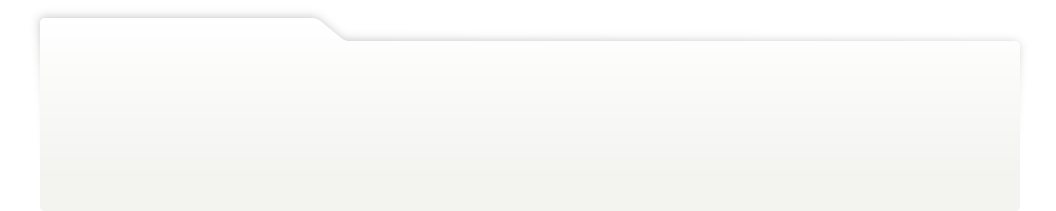
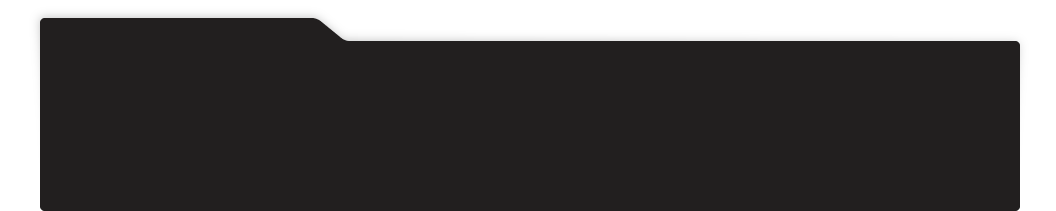
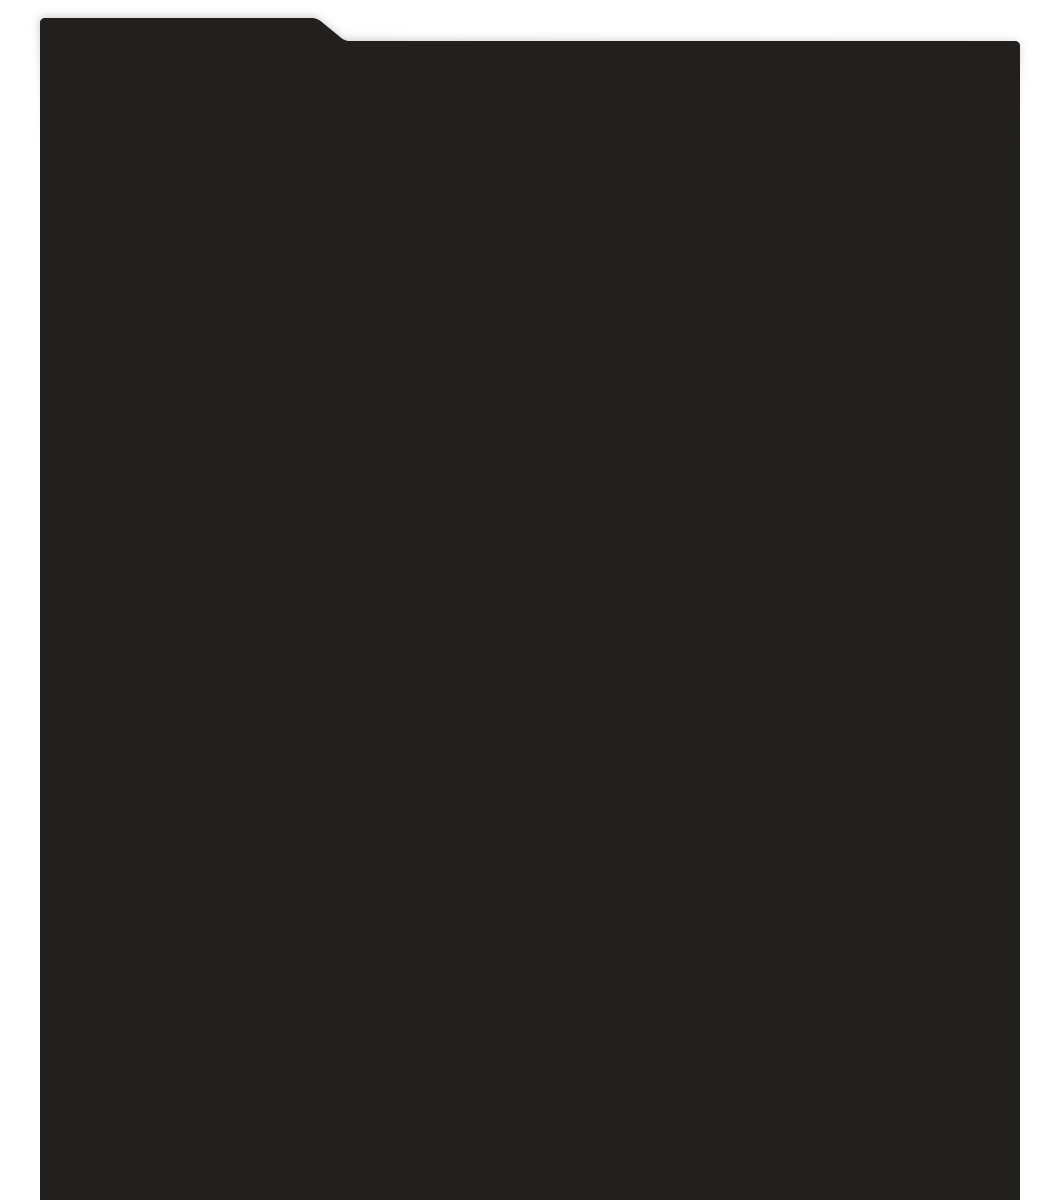
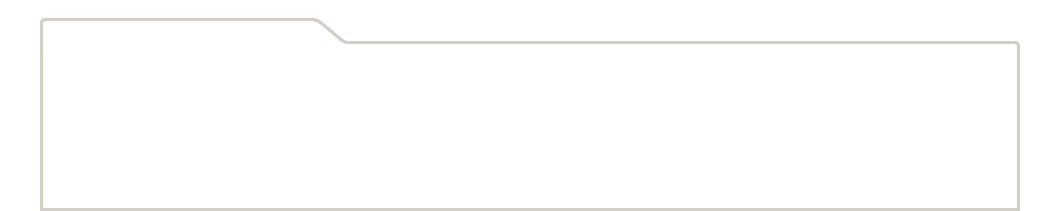
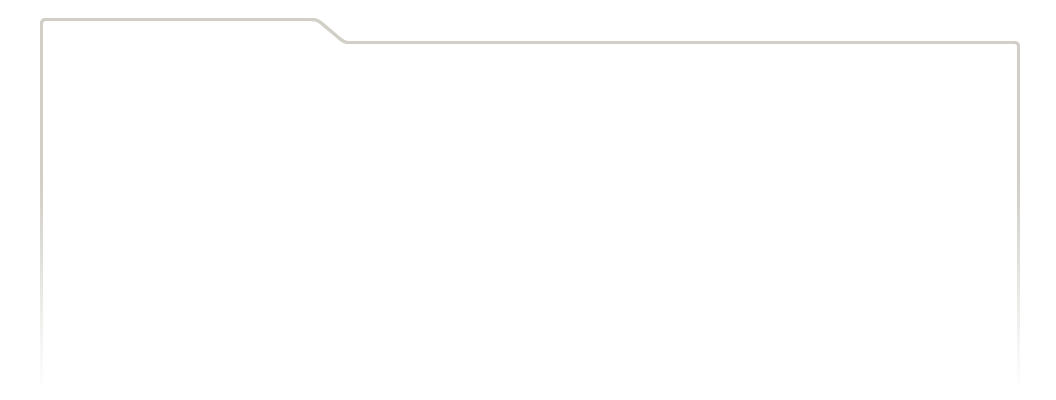
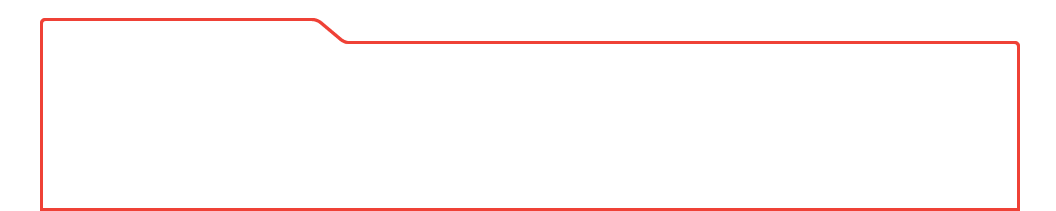
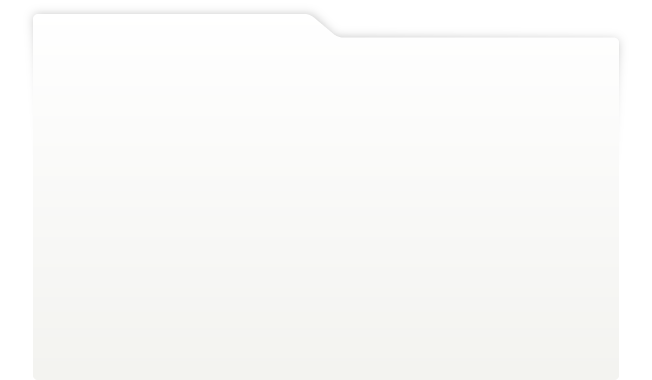
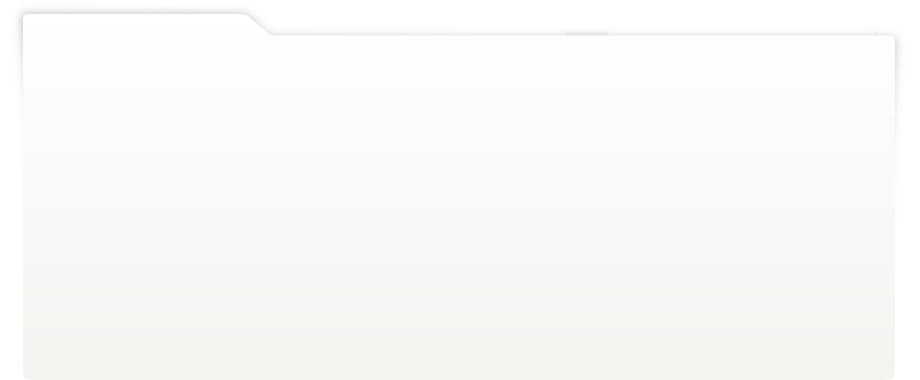
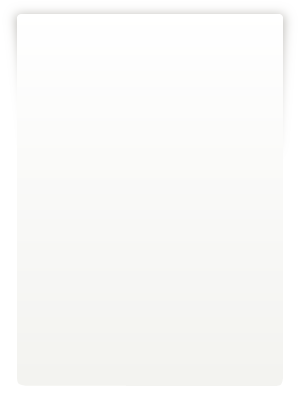
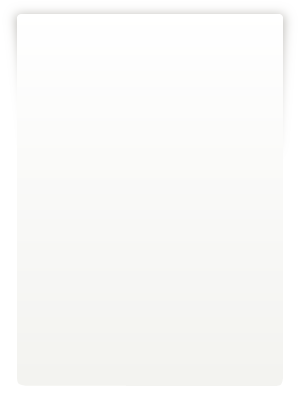
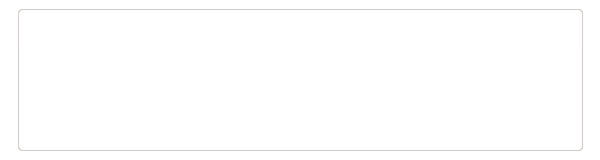
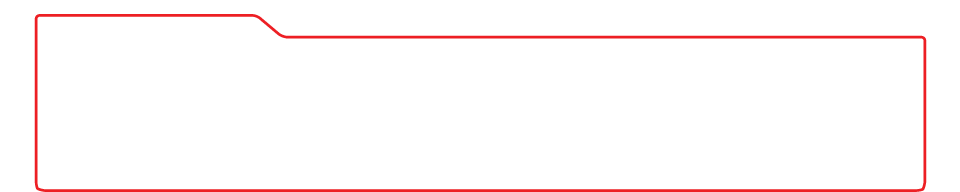
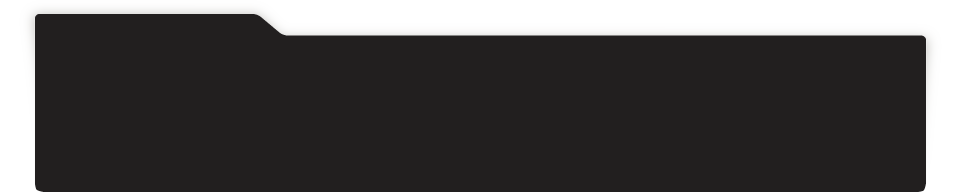
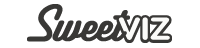
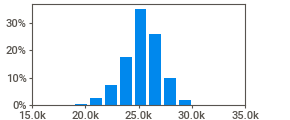
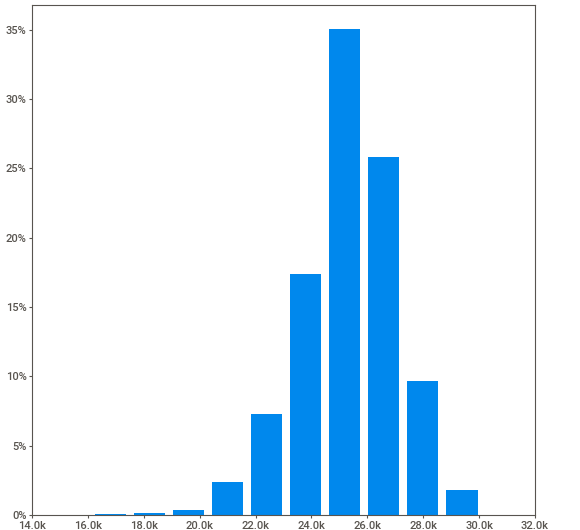
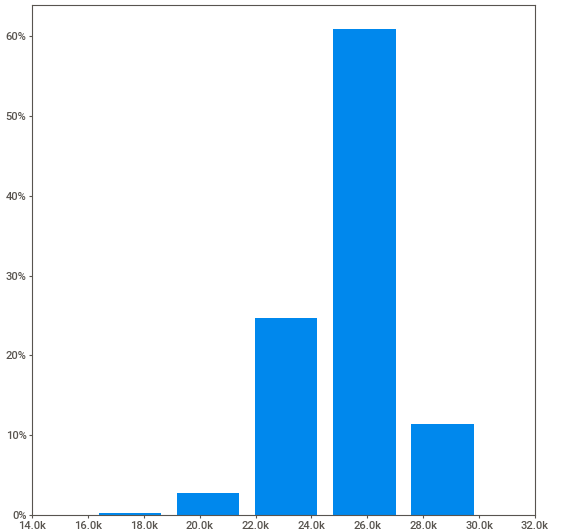
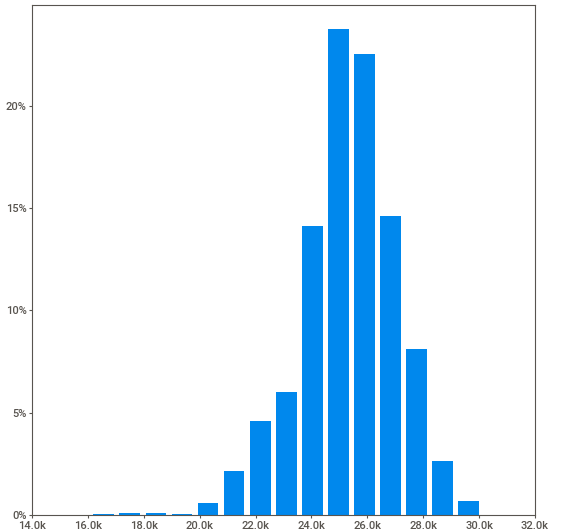
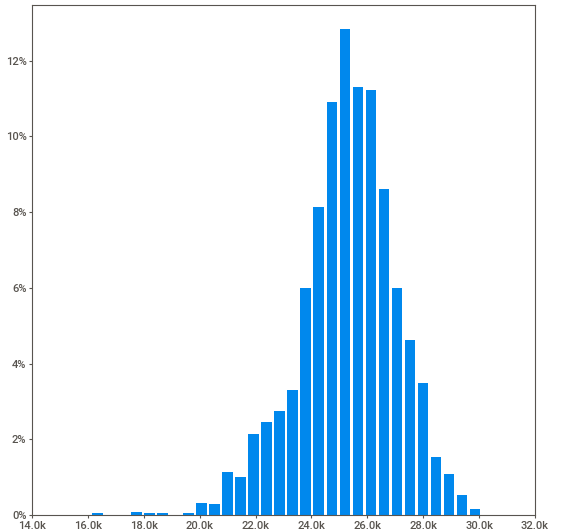
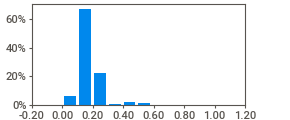
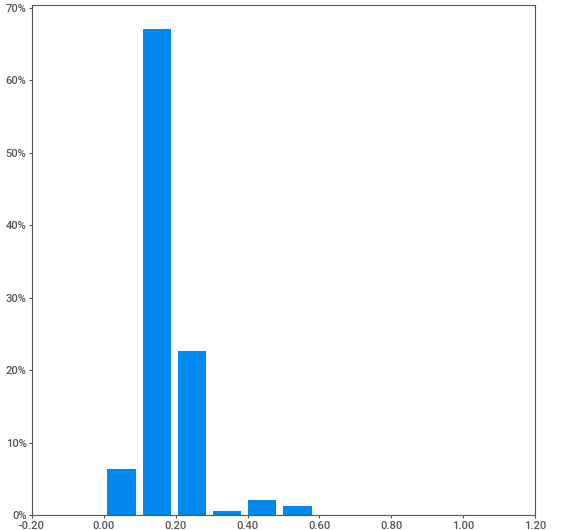
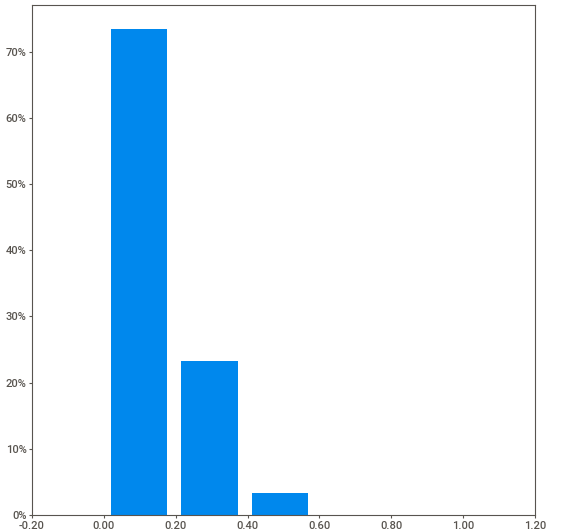
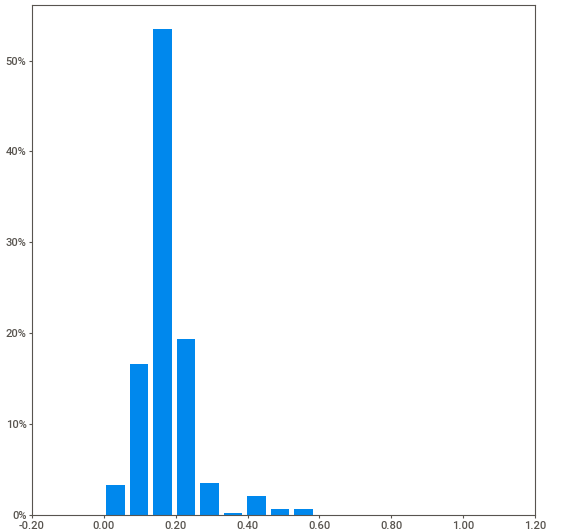
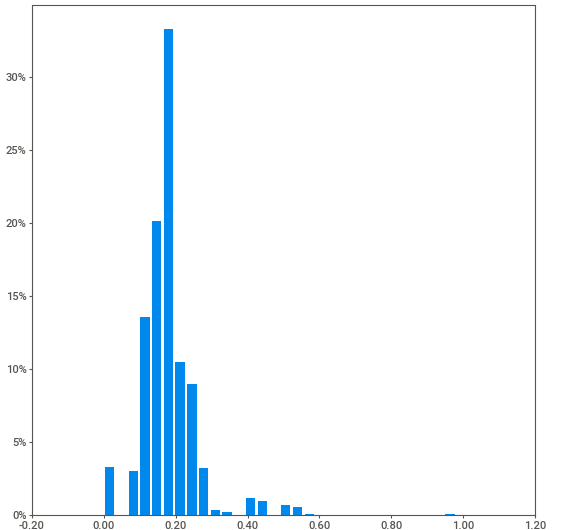
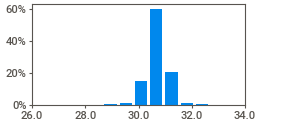
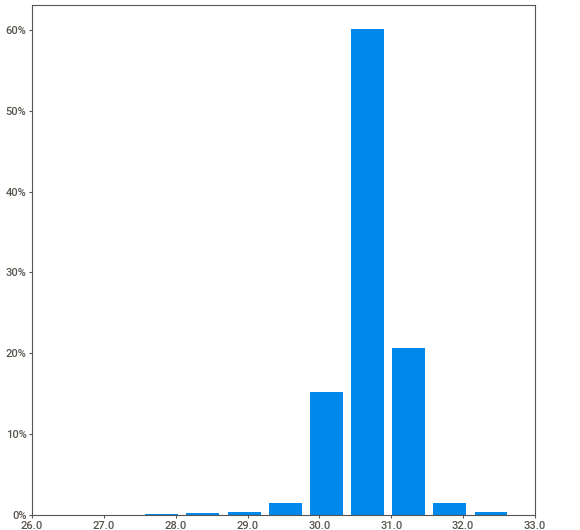
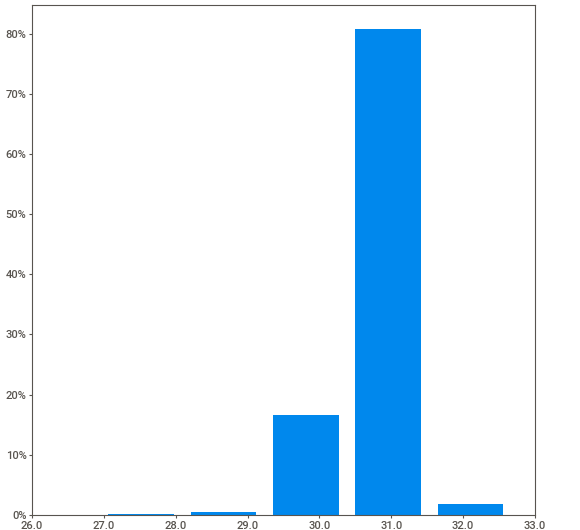
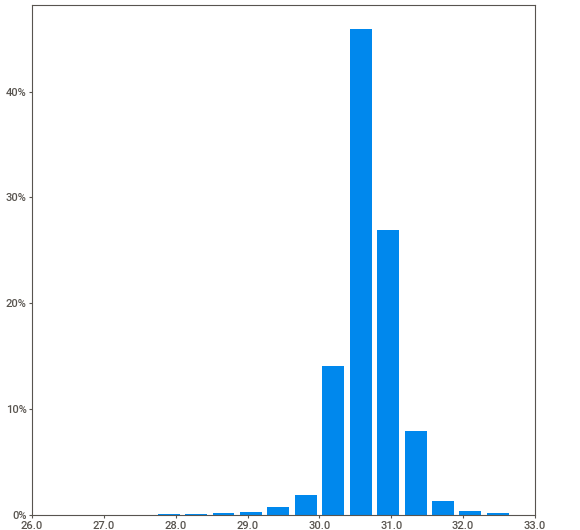
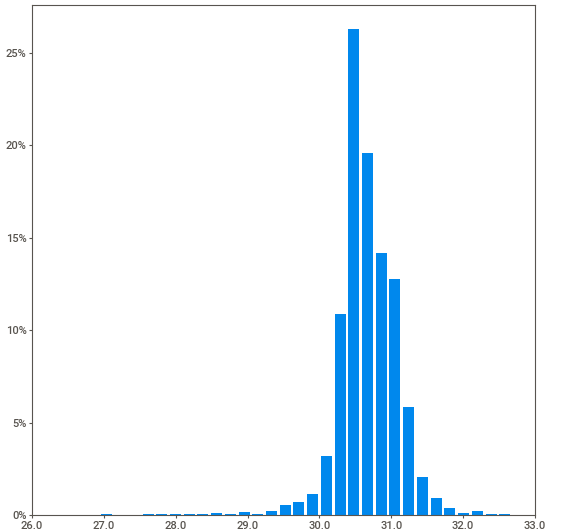
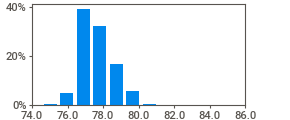
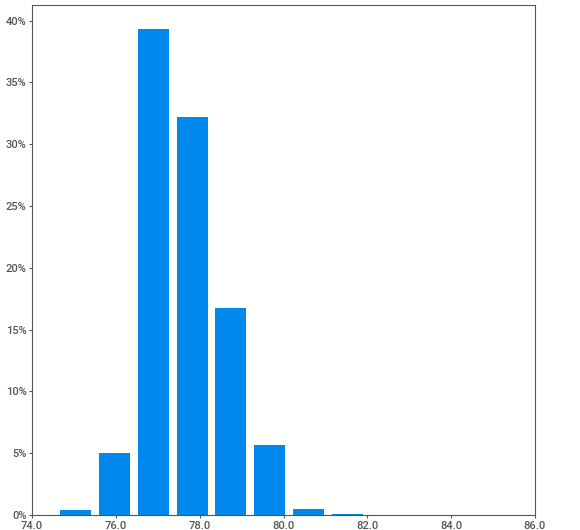
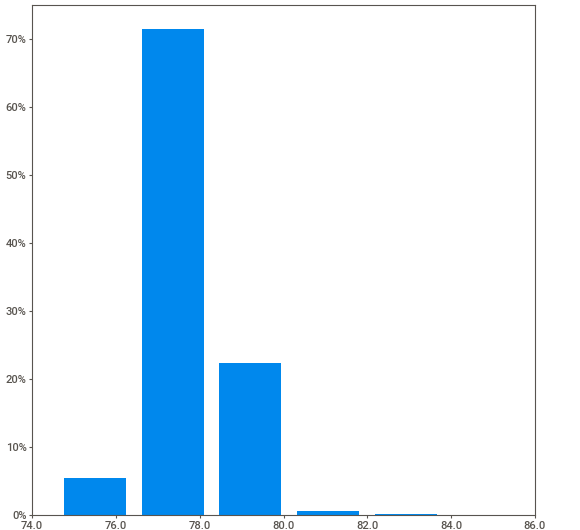
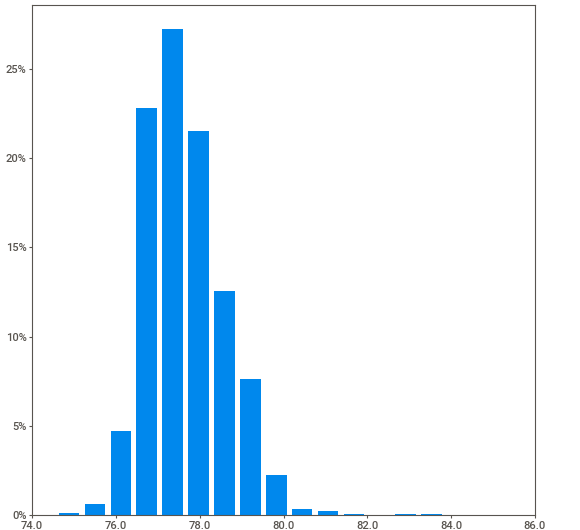
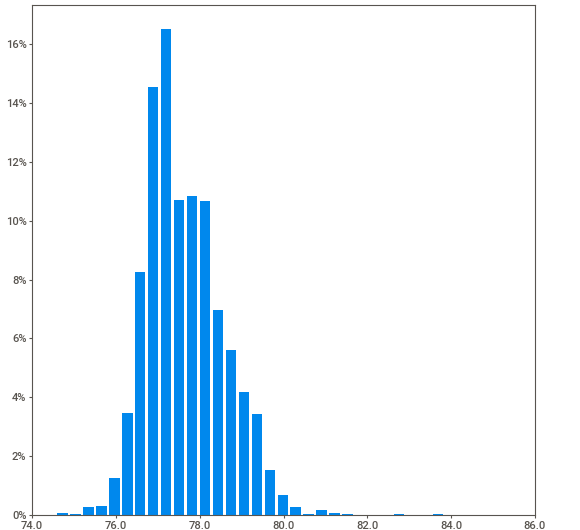
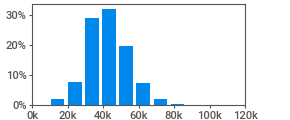
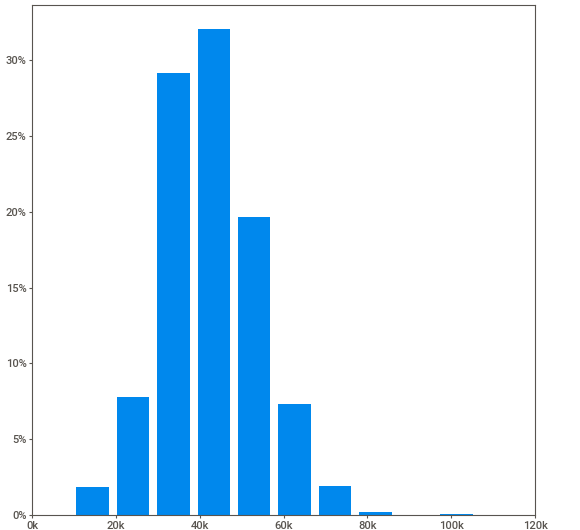
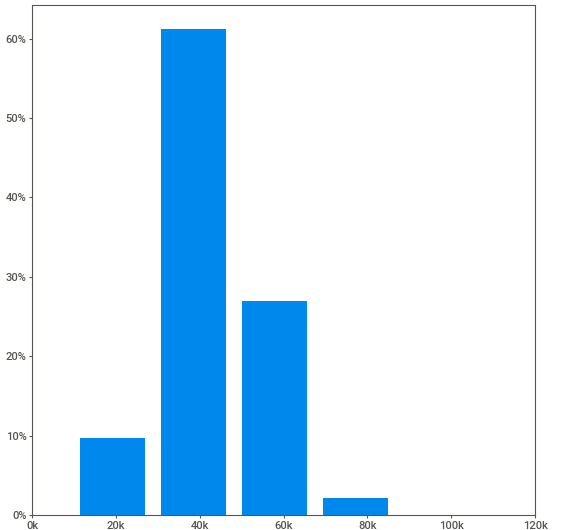
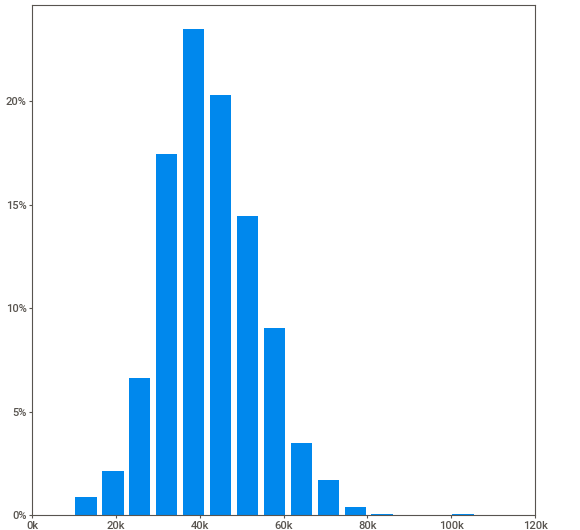
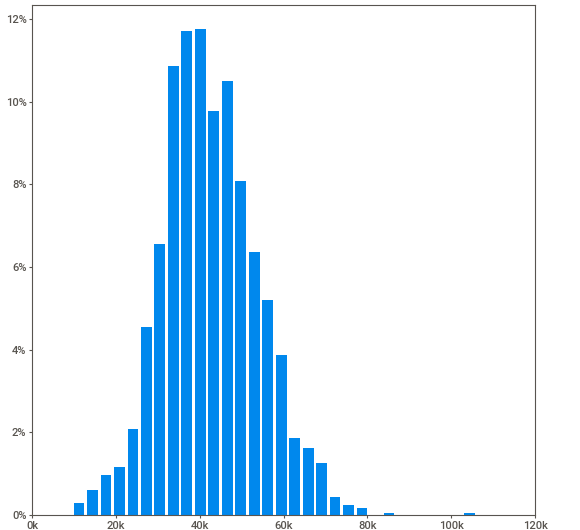
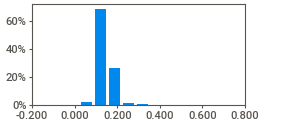
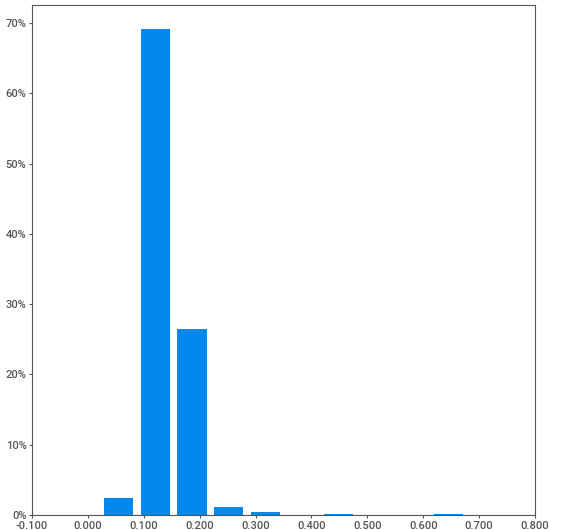
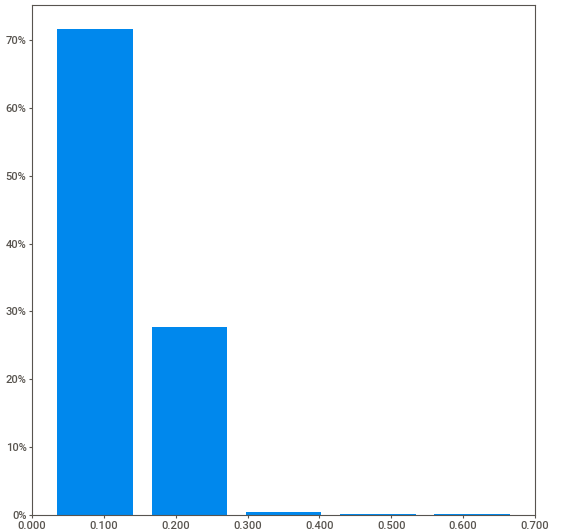
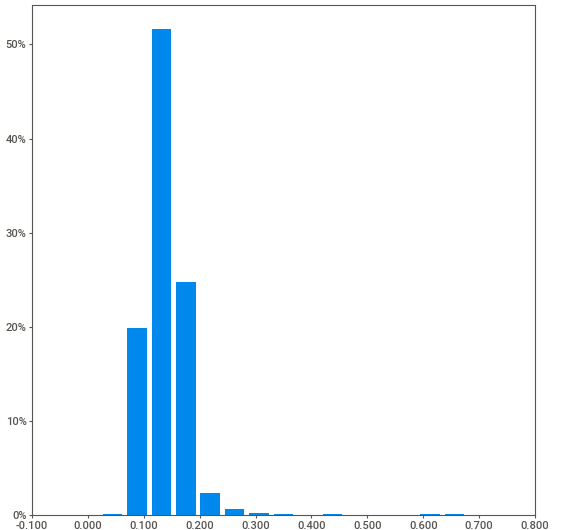
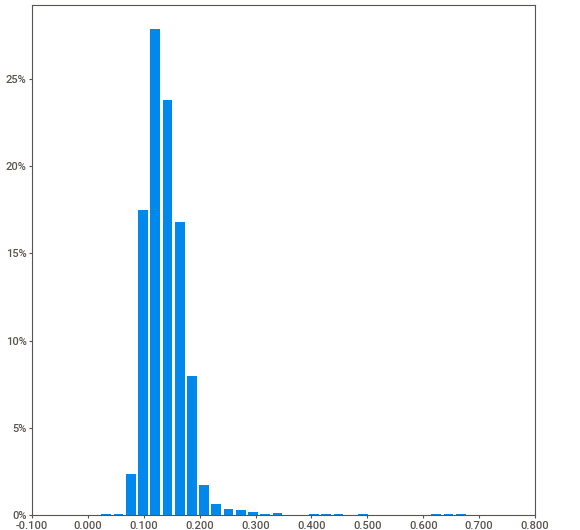
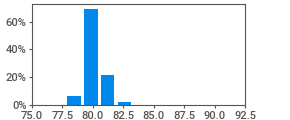
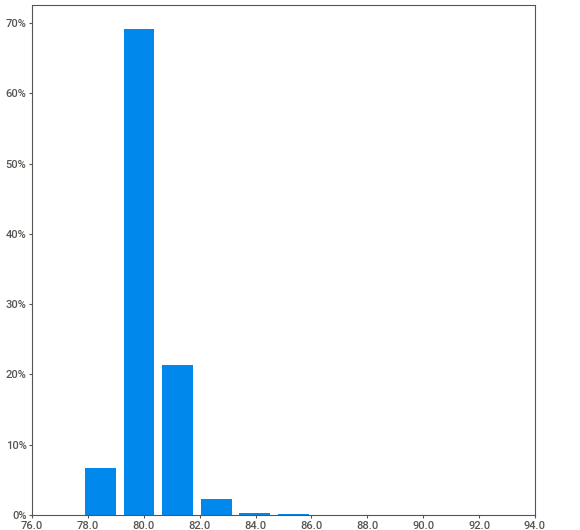
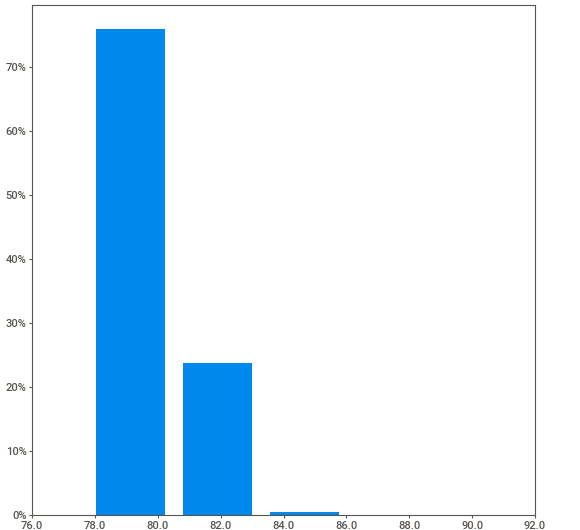
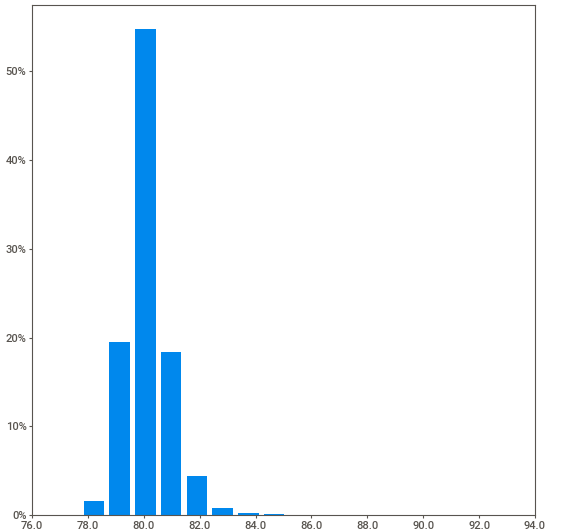
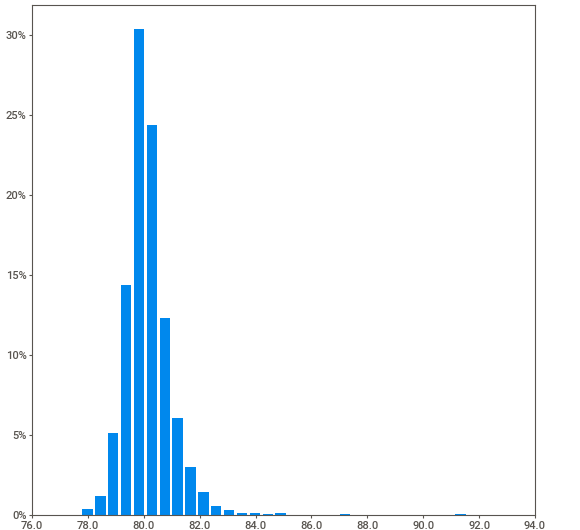
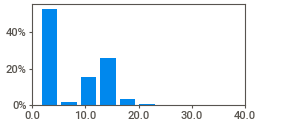
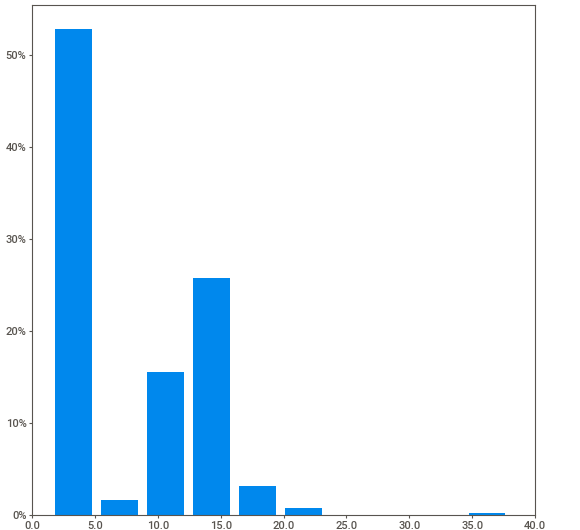
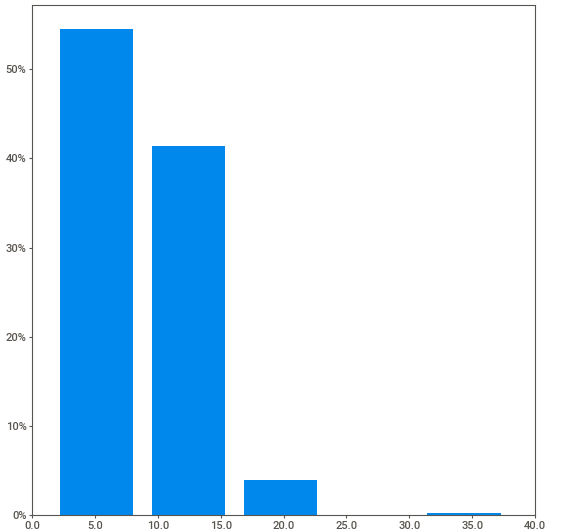
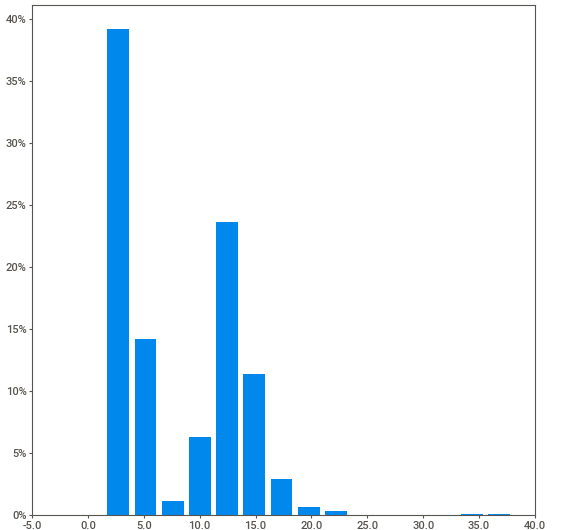
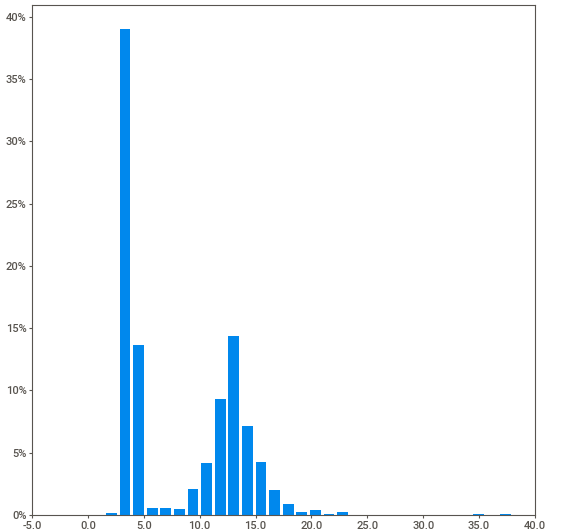
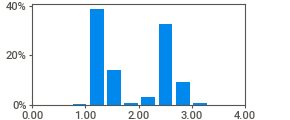
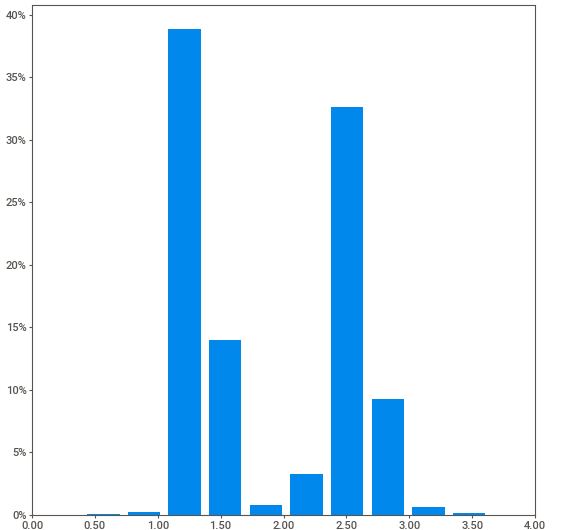
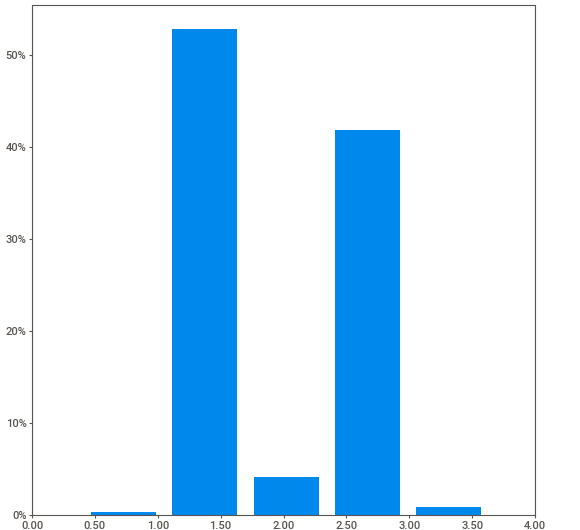
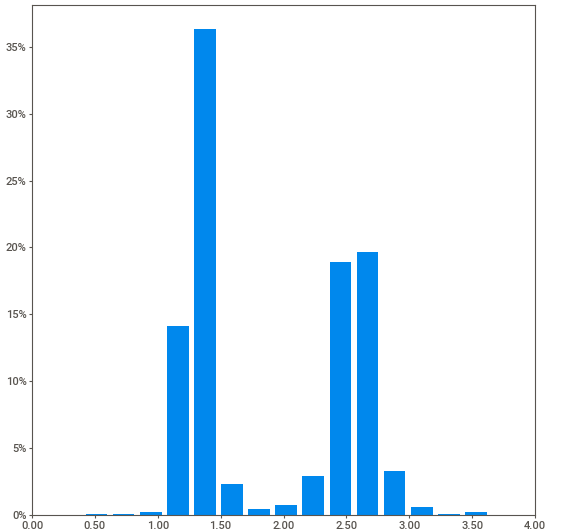
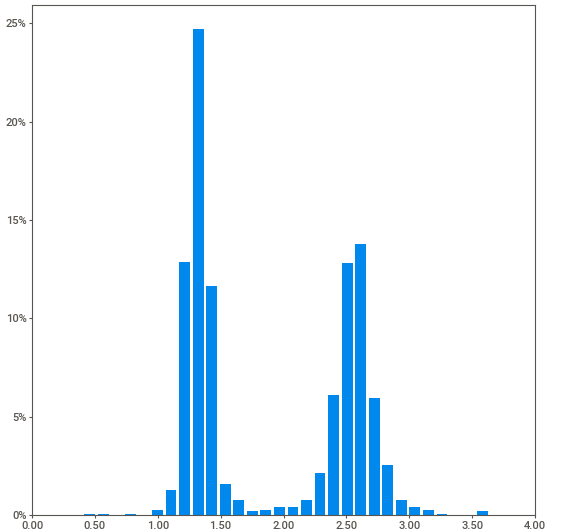
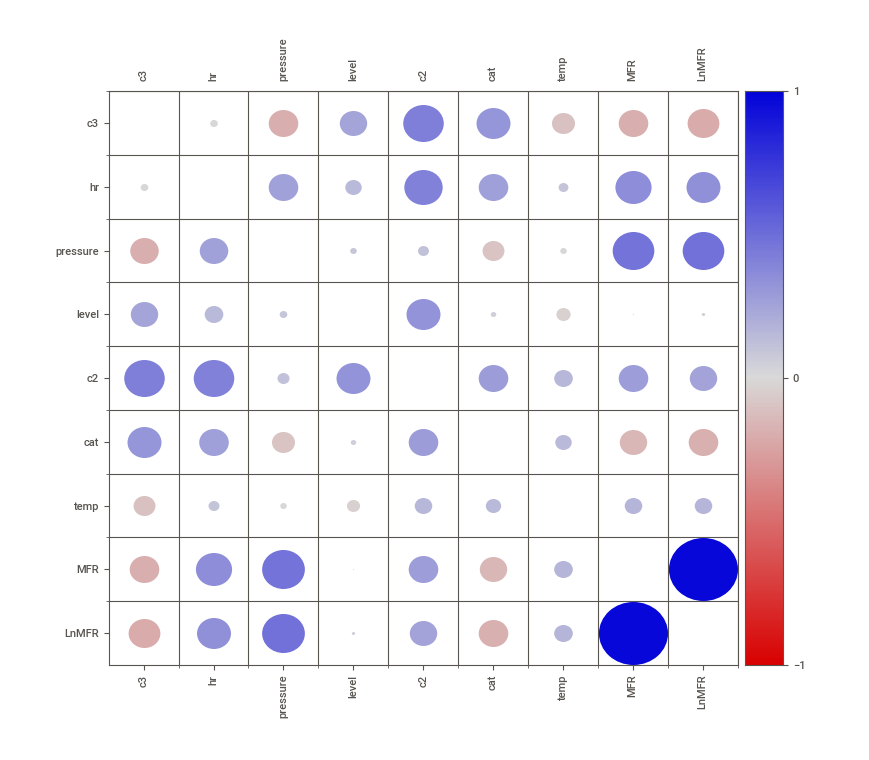
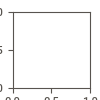

In [ ]:
import IPython
IPython.display.HTML(filename='/content/mfr_polymer.html')

In [ ]:
# delete time column and drop rows with blank values
del data['time']
data.dropna(inplace=True)

print(data.shape)
data.head()

(2484, 9)


,c3,hr,pressure,level,c2,cat,temp,MFR,LnMFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,1.193922


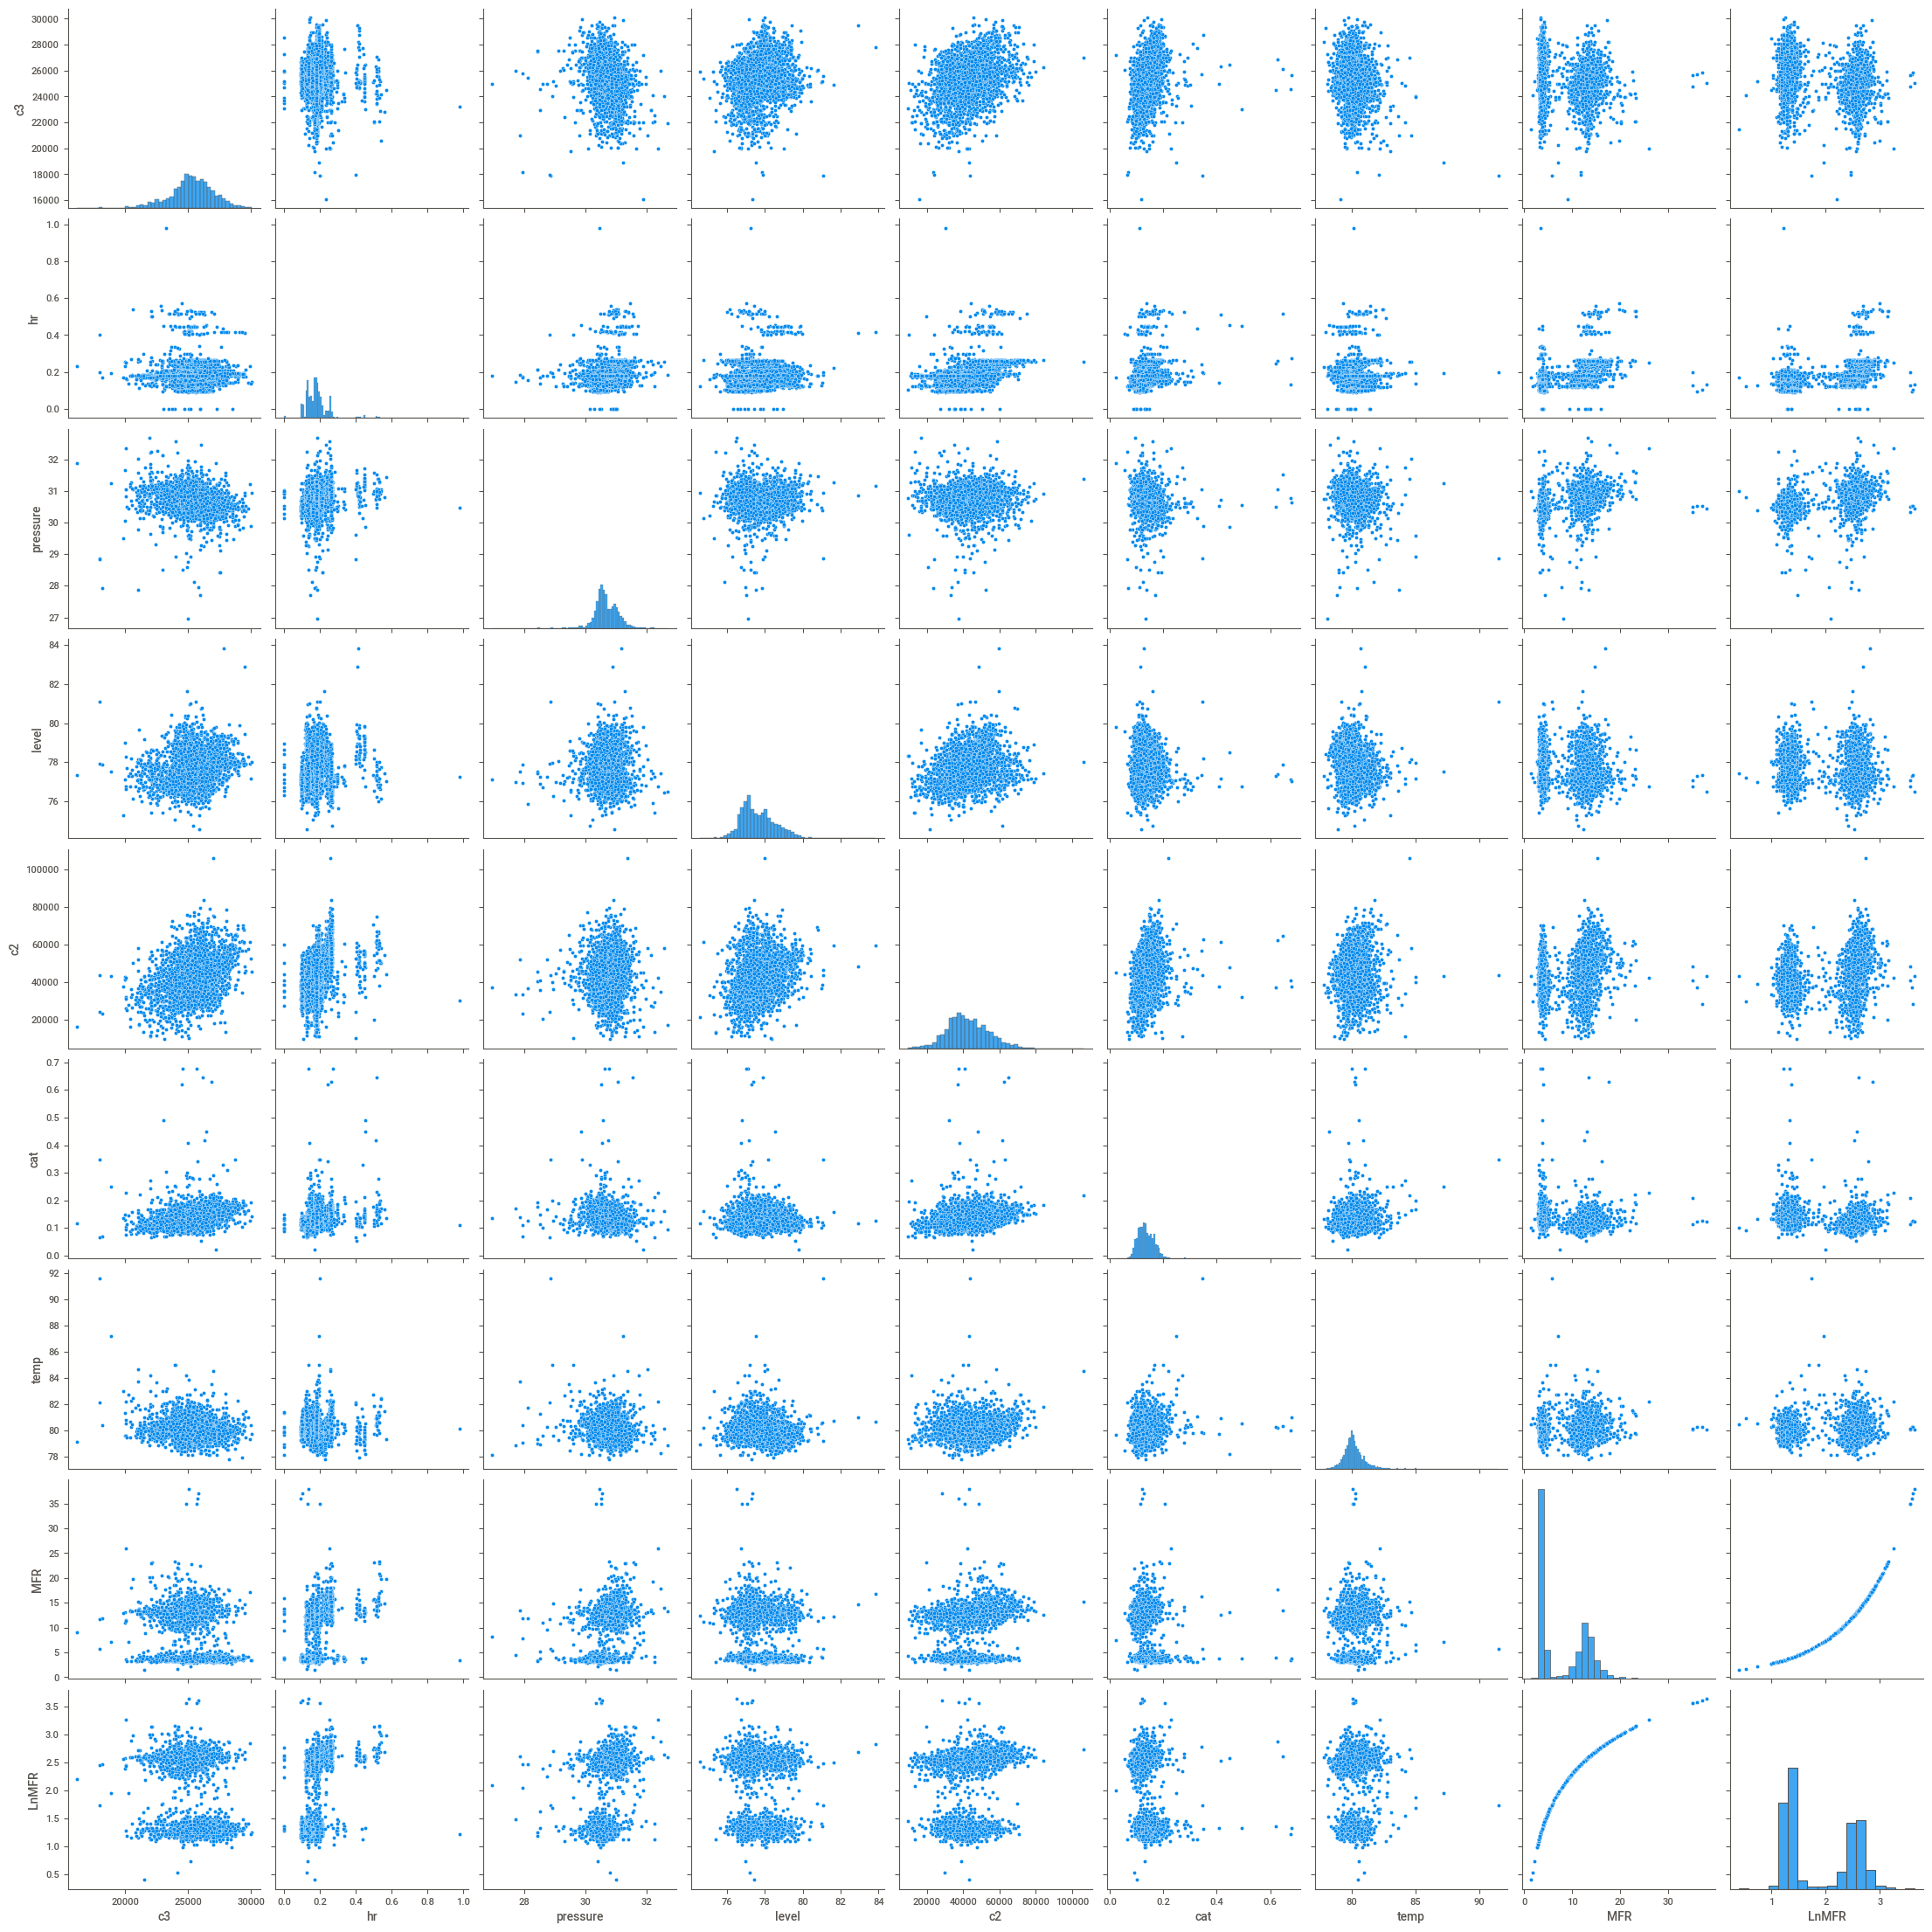

In [ ]:
# pairplot data visualization
sns.pairplot(data)

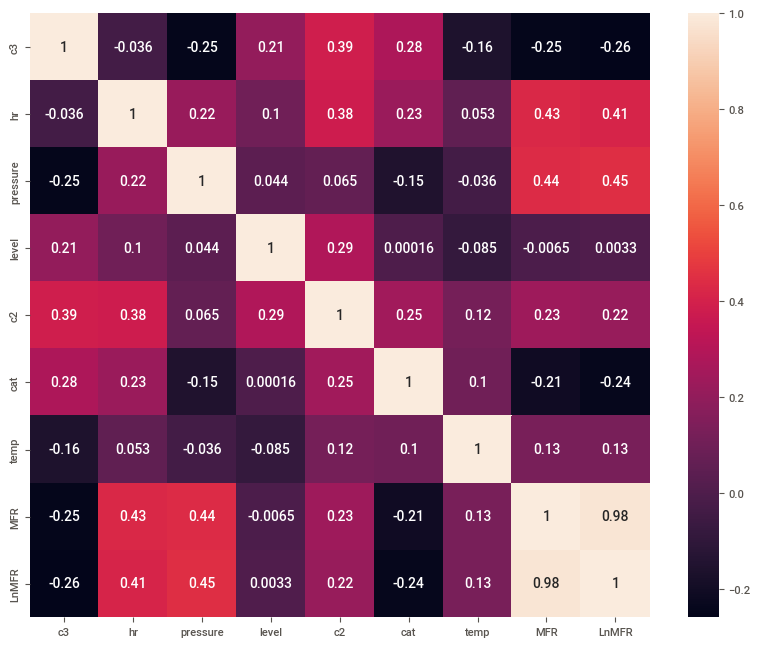

In [ ]:
# correlation mapping

plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

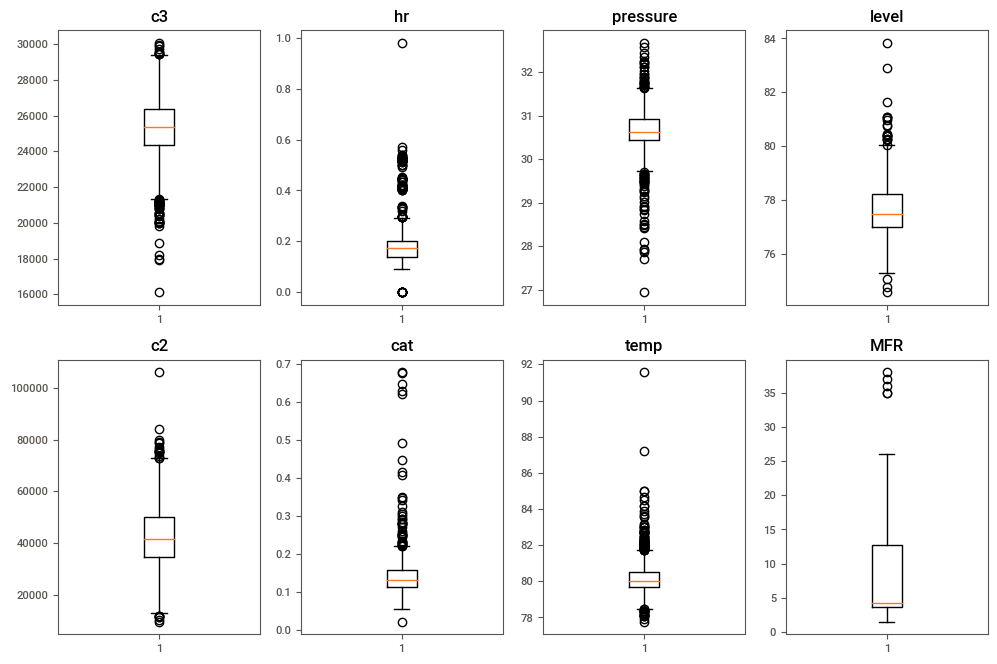

In [ ]:
# boxplot of variables to detect outliers

plt.figure(figsize=(12,8))
for i,c in enumerate(data.columns):
    if i <= 7:
        plt.subplot(2,4, i+1)
        plt.title(c)
        plt.boxplot(data[c])

plt.show()

In [ ]:
# remove outliers from data
data = data[(data['hr']<0.8) & (data['hr']>0.01)]
data = data[data['c2']<100000]
data = data[data['temp']<86]
data = data[data['MFR']<30]
print(data.shape)
data.head()

(2464, 9)


,c3,hr,pressure,level,c2,cat,temp,MFR,LnMFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,1.193922


In [ ]:
# creating a copy of cleaned dataframe to use for model creation
df = data.copy()

# deleting MFR column and keeping only the ln value
del df['MFR']
df.columns

Index(['c3', 'hr', 'pressure', 'level', 'c2', 'cat', 'temp', 'LnMFR'], dtype='object')

In [ ]:
# preparing training and test data
features = df.drop(columns=['LnMFR'])
target = df['LnMFR']

x_train, x_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.2)

# scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# checking the shape of training and test dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1971, 7)
(493, 7)
(1971,)
(493,)


### Building the predictive model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# linear regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

print("Mean Squared Error: ",mean_squared_error(y_test, lr_model.predict(x_test)))
print("R squared value", r2_score(y_test, lr_model.predict(x_test)))

Mean Squared Error:  0.22380893437742716
R squared value 0.44908342533931755


In [ ]:
# support vector regression model
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(x_train, y_train)

print("Mean Squared Error: ",mean_squared_error(y_test, svr_model.predict(x_test)))
print("R squared value", r2_score(y_test, svr_model.predict(x_test)))

Mean Squared Error:  0.10325213357025394
R squared value 0.745839852590493


In [ ]:
from xgboost.sklearn import XGBRegressor

xgbr_model = XGBRegressor()
xgbr_model.fit(x_train, y_train)

y_pred_xgb = xgbr_model.predict(x_test)

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred_xgb))
print("R squared value", r2_score(y_test, y_pred_xgb))

[16:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error:  0.08497576118836778
R squared value 0.7908280318955786


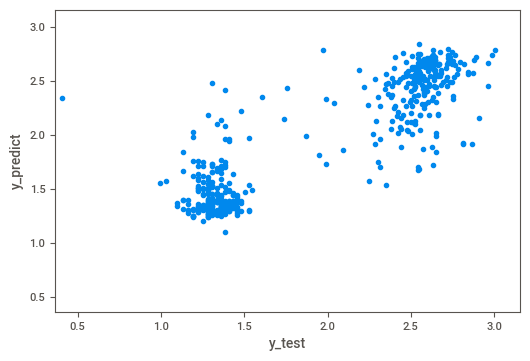

In [ ]:
plt.scatter(y_test, y_pred_xgb)
plt.ylim(min(y_test.min(), y_pred_xgb.min())*0.9, max(y_test.max(), y_pred_xgb.max())*1.05)
plt.xlim(min(y_test.min(), y_pred_xgb.min())*0.9, max(y_test.max(), y_pred_xgb.max())*1.05)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)
y_pred_rfr = rfr_model.predict(x_test)

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred_rfr))
print("R squared value", r2_score(y_test, rfr_model.predict(x_test)))

Mean Squared Error:  0.08005747457874356
R squared value 0.8029346335364421


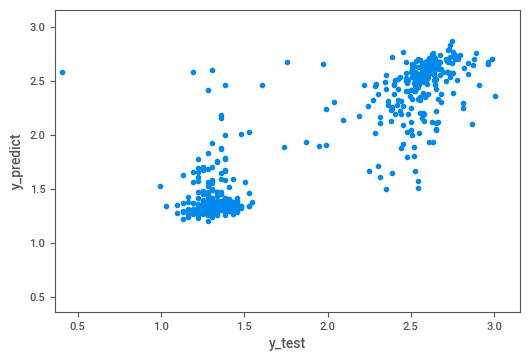

In [ ]:
plt.scatter(y_test, y_pred_rfr)
plt.ylim(min(y_test.min(), y_pred_rfr.min())*0.9, max(y_test.max(), y_pred_rfr.max())*1.05)
plt.xlim(min(y_test.min(), y_pred_rfr.min())*0.9, max(y_test.max(), y_pred_rfr.max())*1.05)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()